## Final Project Submission

Please fill out:
* Student name: JIMCOLLINS WAMAE WANGUKU
* Student pace: full time
* Scheduled project review date/time: 12th March 2023
* Instructor name: William Okomba
* Blog post URL: https://github.com/JIMWAMAE/Phase-1-dscproject


### Introduction


As a data scientist I have been given a task by Microsoft Movie studios to analize given datasets so as to generate insights on what type of films to create. 


#### Objectives

1. Effect of runtime minutes on movie average rating.
2. What are the top perfoming movie genres according to genres average ratings?
3. Effect of directors and writters selection towards movie success.
4. What is the correlation between budget and  revenue generated for a given movie?

#### Business understanding.

Microsoft is a start up business in the movie industry .They see all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We will conduct an exploratory data analysis so as to explore what types of films are currently doing the best at the box office. We will then translate our findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

#### Data understanding

We have been provided with various data sets for the study. This section will give us an overview of the data we will use to genrate our insights.


1. The first data set we will use is the im.db database (https://github.com/JIMWAMAE/dsc-phase-1-project-v2-4/blob/master/zippedData/im.db) whose erd is shown below. It will give us data that relates to the movie genres and ratings from the tables movie_basics and movie_ratings. We will use the persons table and the directors to generate isight about director perfomance as well as writter perfomances.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)


2. The second data set is the movie budget csv file(https://github.com/JIMWAMAE/dsc-phase-1-project-v2-4/blob/master/zippedData/im.db) that will help us visualize revenue generated as well as the budget allocated for the movies.

### Data Preparation

In [215]:
#importing the relevant libraries
import sqlite3
import pandas as pd


In [216]:
# connecting to the database
conn = sqlite3.connect('zippedData/im.db')
cur =conn.cursor()

In [217]:
# Querying the database
df = pd.read_sql (""" SELECT * FROM movie_basics
JOIN movie_ratings
USING (movie_id) """,conn)
df.head(18)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


DATA CLEANING

In [218]:
# We begin with checking for duplicates in our data
df.duplicated().value_counts()
# Since it returned that there are no duplicated values in the data frame 
# we proceed with checking for Nan values

False    73856
dtype: int64

In [219]:
# check for nan values
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

The data subset contains null values in run time minutes and genre with each having 7620 and 804 respectively. We will therefore proceed with dealing with the missing data by further exploring what data is missing and the effect of the missing data for our analysis.

In [220]:
#checking null values in run_time.
df[df['runtime_minutes'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
17,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236
21,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [221]:
# checking the null values in genre
df[df['genres'].isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,6.6,8
29,tt0306058,Second Coming,Second Coming,2012,95.0,None,5.5,20
33,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24
37,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,6.3,6
...,...,...,...,...,...,...,...,...
73644,tt9742106,The Cat in Their Arms,Neko wa Daku Mono,2018,NaN,None,4.5,8
73752,tt9828428,Anjali CBI,Anjali CBI,2019,NaN,None,7.6,20
73798,tt9866736,Rise: Ini Kalilah,Rise: Ini Kalilah,2018,NaN,None,5.8,11
73805,tt9876160,Koridor bessmertiya,Koridor bessmertiya,2019,125.0,None,5.4,45


This gives us a visualisation of what is actually missing which is the duration that a movie lasts. For the 7620 movies we have not been provided with the runtime . This missing data translates to 10% of the total data for run time and 1% for genre . We will therefore proceed with droping the rows containing null values. 

In [222]:
#dropping the missing rows of data
df = df.dropna()


In [223]:
# Checking for missing values in the dataset
df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

Our data set is now free from missing values and duplicates and we can threfore proceed with data exploration.

#### Data exploration

Data exloration will help us in highlighting the patterns and relations in our data set. We will explore the  data set in an unstructured way to uncover patterns, characteristics, and points of interest to help us identify the films that are curently doing well in the curent market. This process isn’t meant to reveal every bit of information that this dataset holds, but rather to help create a broad picture of important trends and major factors that facilitate the success of a film.

In [224]:
# Checking basic descriptive statistics
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


From the above data we can identify some important information such as the average duration that a film runs by the mean value which is 95 minutes while the median is at 91 minutes showing that the mean is positively skewed.
It is also evident that we have possible outliers based on the min duration and the max duration.

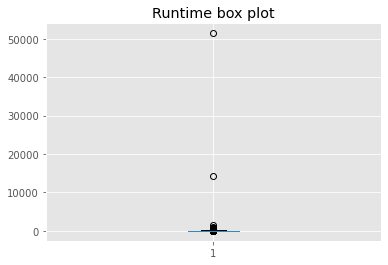

In [225]:
# Visualizing outliers using box plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.boxplot(df.runtime_minutes)
plt.title('Runtime box plot')
plt.show()

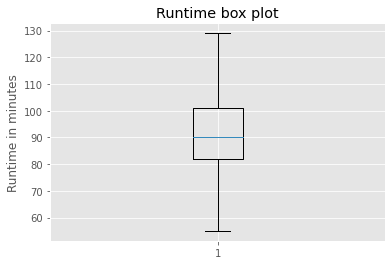

In [226]:
#dealing with the outliers
df1 =df[df['runtime_minutes'].isin(range(55,130))]
plt.style.use("ggplot")
plt.boxplot(df1.runtime_minutes)
plt.ylabel('Runtime in minutes')
plt.title('Runtime box plot')
plt.show()

From the above figures we have visualised the outliers in the data and eliminated them so as to have a data set that is free from outragious values that would affect our study.

Having cleaned the data set we will now proceed with our analysis guided by our objectives so as to come up with the summary of findings

## Getting started

### 1 . Effect of runtime minutes on movie average rating.

With covariance we  want to look at two variables (runtime and average rating) to get an idea about how they change together. This will help us identify how the two variables vary together.

In [227]:
#checking the covariance
import numpy as np
runtime_rating = np.cov(df1.runtime_minutes,df1.averagerating)
runtime_rating

array([[232.30049963,  -0.88116023],
       [ -0.88116023,   2.11127023]])

The covariance between the two variables is -0.88 . A negative covariance indicates that two variables are inversely related. If the covariance for any two variables is negative, that means, both the variables move in the opposite direction. This therefore means that increase in runtime minutes leads to a lesser average rating.

So as to identify the extent of the relationship we will go ahead and identify the correlation between the two variables.

In [228]:
# checking the correlation
correlation_matrix = np.corrcoef(df1.runtime_minutes,df1.averagerating)
correlation_matrix

array([[ 1.        , -0.03978853],
       [-0.03978853,  1.        ]])

The result is a negative correlation of 0.03 signifying a week negative correlation which implies that the significance of the effect of change between runtime and rating is inverse and significantly small.

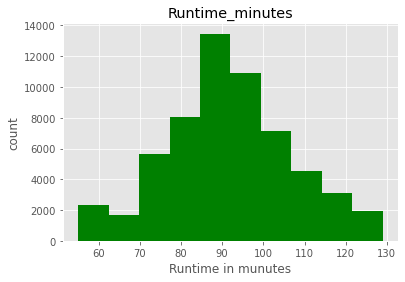

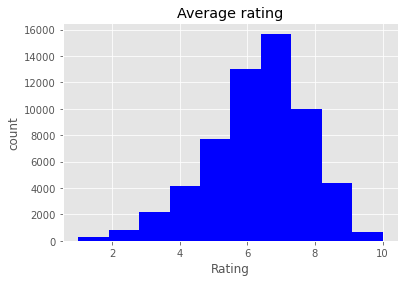

In [229]:
# Distribution of runtime and ratings
plt.hist(df1.runtime_minutes,color='green')
plt.xlabel('Runtime in munutes')
plt.ylabel('count')
plt.title('Runtime_minutes')
plt.show()
plt.hist(df1.averagerating,color='blue')
plt.xlabel('Rating')
plt.ylabel('count')
plt.title('Average rating')
plt.show()


#### Conclusion

1. From the covariance we get to identify a negative covariance between the the runtime and average ratings which signifies that they are inversely related . Therefore movies with shorter runtime tend to receive higher ratings.

2. From the correlation analysis we realize that the relationship is a week negative correlation therefore signifying that despite the fact that the two are inversely related the change in one affects the other slightly.

3.  From the histograms we can draw some insight that most of the movies being produced in the market range from 75 minutes and 100 minutes and that most movies receive a rating between 6 and 8. We can also identify that the data is not semetrical for both the variables.

### 2. Top perfoming movie genres according to genres average ratings.

This aims at identifying the top produced genres in the market so as to provide Microsoft studios with an idea of what film to produce so as to generate a high average rating from the industry and in return a higher profit margin as a result of increased sales.

In [230]:
# Checking the top genres produced
df_genre = df.genres.value_counts().head(12)
df_genre

Drama                   10189
Documentary              9149
Comedy                   4604
Comedy,Drama             2451
Horror                   2232
Drama,Romance            1392
Thriller                 1288
Comedy,Drama,Romance     1159
Comedy,Romance           1128
Horror,Thriller           943
Drama,Thriller            938
Action                    721
Name: genres, dtype: int64

Having obtained a significant sample from the population of the genre count we will proceed with grouping our data using the genres so as to obtain a dataset that will enable us to calculate the average rating per genre.

In [231]:
''' This code aims to select only the movies in the sample genre 
we created and puting them in a dataframe which is a summary of the popular genres'''
options = ['Drama',
'Comedy',
'Documentary',
'Comedy,Drama',
'Horror',
'Drama,Romance',
'Thriller',
'Comedy,Drama,Romance',
'Comedy,Romance',
'Horror,Thriller',
'Drama,Thriller',
'Action']
dfg = df1[df1['genres'].isin(options)]
dfg

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8
...,...,...,...,...,...,...,...,...
73846,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy,4.2,13
73847,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019,97.0,Comedy,7.0,9
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6


In [232]:
# This code aims at displaying the grouped data frame that will be grouped by genre and movie id
genre_grouping = dfg.groupby(['genres','movie_id'])
genre_grouping1 = genre_grouping.first()
genre_grouping1

primary_title      original_title  start_year  \
genres   movie_id                                                        
Action   tt0439801  Segurança Nacional  Segurança Nacional        2010   
         tt0810815      Cross the Line      Cross the Line        2010   
         tt0846004   Gangster Exchange   Gangster Exchange        2010   
         tt0929742        Deep Gold 3D           Deep Gold        2011   
         tt0977639       Boyle Heights       Boyle Heights        2010   
...                                ...                 ...         ...   
Thriller tt9795264           Risknamaa           Risknamaa        2019   
         tt9805504           Breakaway               Otryv        2019   
         tt9818000           Girl Dorm           Girl Dorm        2019   
         tt9855990    Nightmare Tenant    Nightmare Tenant        2018   
         tt9894098              Sathru              Sathru        2019   

                    runtime_minutes  averagerating  numvotes  
genres   movie_id                                             
Action   tt0439801             86.0            3.3       260  
         tt0810815             87.0            3.9        39  
         tt0846004             95.0            4.6       436  
         tt0929742             86.0            3.3       315  
         tt0977639            101.0            4.6         9  
...                             ...            ...       ...  
Thriller tt9795264            123.0            8.0         9  
         tt9805504             85.0            4.9        75  
         tt9818000             88.0            6.0        25  
         tt9855990             90.0            6.0        98  
         tt9894098            129.0            6.3       128  

[32680 rows x 6 columns]

Having grouped the data we will now proceed with tabulating the averagerating mean per genre. 

In [233]:
# a code to calculate the mean average genre rating/sorting the values
avgrating_mean = dfg.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(12)
#rounding off the values
avgrating_mean  = round(avgrating_mean,1)
avgrating_mean

genres
Documentary             7.3
Drama                   6.5
Comedy,Drama            6.4
Comedy,Drama,Romance    6.3
Drama,Romance           6.2
Drama,Thriller          6.1
Comedy,Romance          5.8
Comedy                  5.8
Action                  5.6
Thriller                5.5
Horror,Thriller         4.7
Horror                  4.7
Name: averagerating, dtype: float64

''

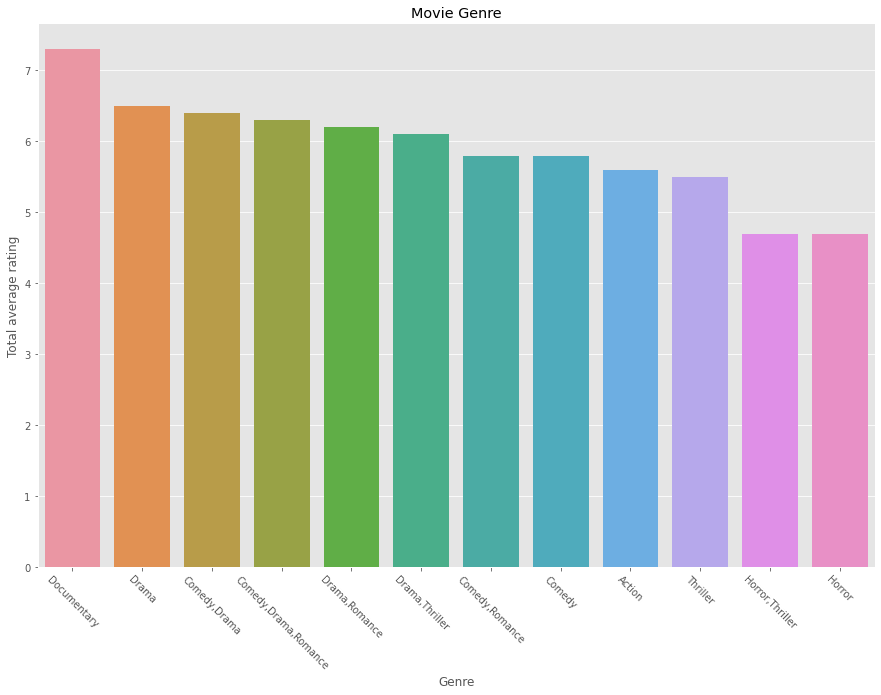

In [234]:
# A code to plot the bargraph
fig,ax = plt.subplots( figsize=(15,10))
sns.barplot(data=avgrating_mean,x=avgrating_mean.index,y= avgrating_mean.values,order= avgrating_mean.values)
plt.xticks(range(len(avgrating_mean)), avgrating_mean.index,rotation=-45)
plt.xlabel('Genre')
plt.ylabel('Total average rating')
plt.title('Movie Genre')
;

#### Conclusion


In the movie industry there are various genres which all perfom differently in terms of the average rating . We have used the data provided so as to identify the top perfoming genres according to rating . The top perfoming genre happens to be Documentary and drama with an average rating of above 6. It is therefore advised that prior to deciding what movie to produce in the studio always concider what genre so as to achieve the target rating and also to make the best out of the business.

### 3. Effect of directors and writters selection towards movie success.  

This study seeks to identify the effect of using different directors and writteres for a movie creation. All the directors and writters have different experiences in the industry and choosing an experienced one with a good average rating will influence the quality of your movie and in turn a great rating and revenue generation.

In [235]:
# Visualizing the table directors
df3 =  pd.read_sql (""" SELECT * FROM directors
 """,conn)
df3.head(18)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
5,tt0878654,nm2291498
6,tt0878654,nm2292011
7,tt0879859,nm2416460
8,tt0996958,nm2286991
9,tt0996958,nm2286991


In [236]:
# Checking for duplicates
df3.person_id.duplicated().value_counts()

True     181921
False    109253
Name: person_id, dtype: int64

In [237]:
# Querying the tables so as to deal with duplicates by grouping the directors
df2 = pd.read_sql (""" SELECT primary_name,person_id AS Director_id,movie_id,runtime_minutes,averagerating FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN directors
USING (movie_id)
JOIN persons
USING (person_id)

GROUP BY Director_id

 """,conn)

df2

,primary_name,Director_id,movie_id,runtime_minutes,averagerating
0,Orson Welles,nm0000080,tt0069049,122.0,6.9
1,Woody Allen,nm0000095,tt1182350,98.0,6.3
2,Luc Besson,nm0000108,tt0940656,101.0,5.5
3,Kenneth Branagh,nm0000110,tt0800369,115.0,7.0
4,John Carpenter,nm0000118,tt1369706,89.0,5.6
...,...,...,...,...,...
57236,Dahl Lee,nm9992852,tt8757056,NaN,8.4
57237,Dongwoo Ko,nm9992853,tt8757056,NaN,8.4
57238,Hepi Mita,nm9992905,tt8742574,89.0,7.3
57239,Laura Cazador,nm9992927,tt7331606,94.0,8.5


In [238]:
# A query to create new columns sum of ratings and number of raatings so as to get the total average rating.
df5 = pd.read_sql (""" SELECT primary_name,
person_id AS Director_id,movie_id,runtime_minutes,averagerating,COUNT(averagerating)AS numberOfRatings,
SUM(averagerating)AS sumOfRatings,
SUM(averagerating)/COUNT(averagerating) AS total_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN directors
USING (movie_id)
JOIN persons
USING (person_id)

GROUP BY Director_id
HAVING numberOfRatings>20
ORDER BY total_rating DESC
LIMIT 10;	

 """,conn)
df5 = df5.dropna()

df5

,primary_name,Director_id,movie_id,runtime_minutes,averagerating,numberOfRatings,sumOfRatings,total_rating
0,Dennis Korbylo,nm6179119,tt3428990,90.0,9.0,28,252.0,9.000000
1,Erin Korbylo,nm6179118,tt3428990,90.0,9.0,28,252.0,9.000000
2,Sylvia Broeckx,nm6179115,tt3428990,90.0,9.0,28,252.0,9.000000
3,Joe Russo,nm0751648,tt1843866,136.0,7.8,30,247.4,8.246667
4,Anthony Russo,nm0751577,tt1843866,136.0,7.8,30,247.4,8.246667
5,Pauli Janhunen Calderón,nm6216421,tt3477564,52.0,7.5,23,187.5,8.152174
6,S.S. Rajamouli,nm1442514,tt1582546,125.0,7.4,22,175.7,7.986364
7,Sukumar,nm1335875,tt1869226,141.0,7.0,25,199.2,7.968000
8,Declan Lynch,nm3371703,tt3295964,90.0,6.8,26,199.9,7.688462
9,Rich Moore,nm0601781,tt1772341,101.0,7.7,23,174.7,7.595652


In [239]:
#Displaying the director name and total rating
df5_1 = df5.drop(["Director_id","movie_id","runtime_minutes","averagerating","numberOfRatings","sumOfRatings"],axis=1)
df5_1

,primary_name,total_rating
0,Dennis Korbylo,9.000000
1,Erin Korbylo,9.000000
2,Sylvia Broeckx,9.000000
3,Joe Russo,8.246667
4,Anthony Russo,8.246667
5,Pauli Janhunen Calderón,8.152174
6,S.S. Rajamouli,7.986364
7,Sukumar,7.968000
8,Declan Lynch,7.688462
9,Rich Moore,7.595652


Having created a data frame showing the top 10 movie directors we will now create a bar graph showing the best movie director.

In [240]:
#Importing seaborn for ploting and rounding off the ratings
import seaborn as sns
df5_1.total_rating= round(df5_1.total_rating,1)

''

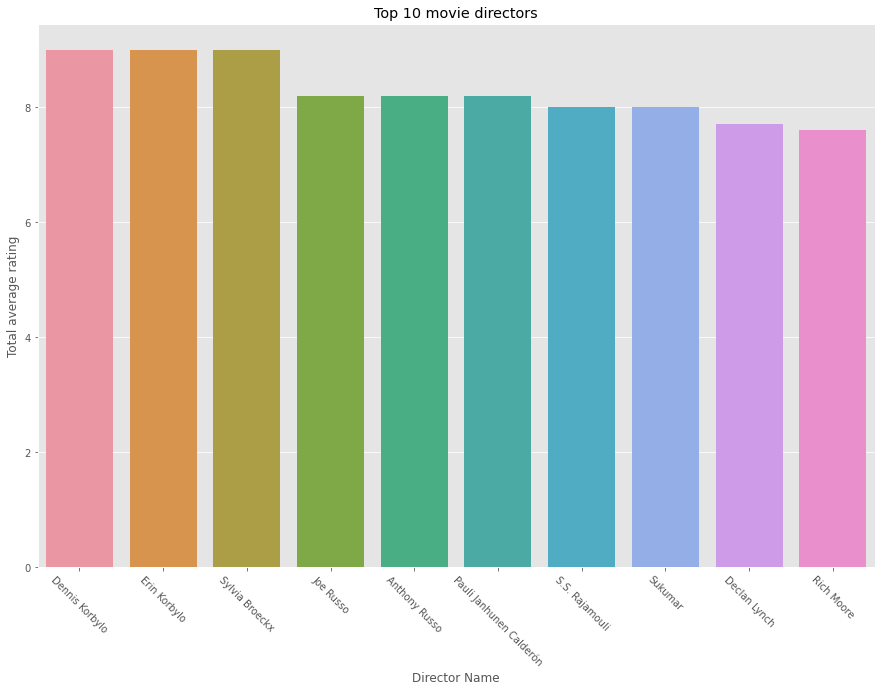

In [241]:
# A code to plot the bargraph
fig,ax = plt.subplots( figsize=(15,10))
sns.barplot(data=df5_1,x=df5_1.primary_name,y= df5_1.total_rating)
plt.xticks(rotation=-45)
plt.xlabel('Director Name')
plt.ylabel('Total average rating')
plt.title('Top 10 movie directors')
;

From this data we can identify the directors whose movie average ratings are highest from a sample of 20 movies directed as the minimum movie count. This brings us to the conclusion that movie succes is related to the choice of director. We will now proceed with investigating the effect of writter selection on movie success.

In [242]:
#selecting top movie writters based on average rating
df6= pd.read_sql (""" SELECT primary_name,
person_id AS Writter_id,movie_id,runtime_minutes,averagerating,COUNT(averagerating)AS numberOfRatings,
SUM(averagerating)AS sumOfRatings,
SUM(averagerating)/COUNT(averagerating) AS total_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN writers
USING (movie_id)
JOIN persons
USING (person_id)

GROUP BY Writter_id
HAVING numberOfRatings>20
ORDER BY total_rating DESC
LIMIT 10;	

 """,conn)
df6 = df6.dropna()

df6

,primary_name,Writter_id,movie_id,runtime_minutes,averagerating,numberOfRatings,sumOfRatings,total_rating
0,Andrés Gómez D.,nm7553102,tt4980150,100.0,8.1,21,170.1,8.100000
1,Juan Gordon,nm7553098,tt4980150,100.0,8.1,21,170.1,8.100000
2,Jörn Röver,nm1841673,tt1779471,91.0,7.8,22,170.1,7.731818
3,Jack Kirby,nm0456158,tt0458339,124.0,6.9,27,197.2,7.303704
4,Sara Hribar,nm2543803,tt2255032,100.0,7.6,25,180.6,7.224000
5,Mark Monroe,nm0598531,tt1262986,90.0,7.9,42,303.2,7.219048
6,Ryan Henry Knight,nm9160937,tt4050462,142.0,7.2,85,613.6,7.218824
7,Vlatka Vorkapic,nm1204572,tt1723793,72.0,9.0,24,173.2,7.216667
8,Pete Navarro,nm8343598,tt4050462,142.0,7.2,83,597.6,7.200000
9,Julien Dinse,nm8337609,tt4050462,142.0,7.2,83,597.6,7.200000


In [243]:
#Displaying the writter name and total rating
df6_1 = df6.drop(["Writter_id","movie_id","runtime_minutes","averagerating","numberOfRatings","sumOfRatings"],axis=1)
df6_1

,primary_name,total_rating
0,Andrés Gómez D.,8.100000
1,Juan Gordon,8.100000
2,Jörn Röver,7.731818
3,Jack Kirby,7.303704
4,Sara Hribar,7.224000
5,Mark Monroe,7.219048
6,Ryan Henry Knight,7.218824
7,Vlatka Vorkapic,7.216667
8,Pete Navarro,7.200000
9,Julien Dinse,7.200000


In [244]:
#Importing seaborn for ploting and rounding off the ratings
import seaborn as sns
df6_1.total_rating= round(df6_1.total_rating,1)

''

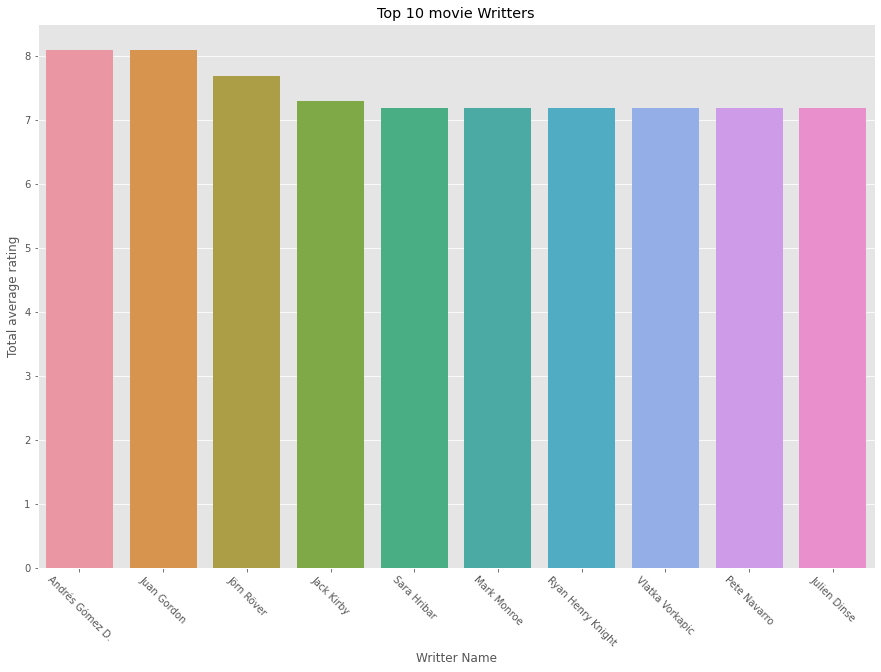

In [245]:
# A code to plot the bargraph
fig,ax = plt.subplots( figsize=(15,10))
sns.barplot(data=df6_1,x=df6_1.primary_name,y= df6_1.total_rating)
plt.xticks(rotation=-45)
plt.xlabel('Writter Name')
plt.ylabel('Total average rating')
plt.title('Top 10 movie Writters')
;

This data represents the top 10 writters that have significantly had succesful movie writting carreers from a minimum sample of 20 movies. Equally the choice of a writter will have effect on the movie success.

#### Conclusion

1. In the movie industry there are various directors that are in the industry. The directors have all had different experience in the industry and different movie ratings. The choice of the director will affect the movie rating and thus one will need to select the director base on their success.

2. Similarly in the  movie industry there are various writters that are in the industry. The writters have all had different experience in the industry and different movie ratings. The choice of the writter will affect the movie rating and thus one will need to select the director base on their success.

### 4. What is the correlation between budget and  revenue generated for a given movie.

This aims at establishing the relationship between budget assigned to a movie and the profits that the movie will generate. We will evaluate the significance of increace in budget towards the revenue generated and also cunduct a correlation analysis to identify the relationship between the two and how they affect each other.

In [257]:
# Importing csv to read the csv dataset
import csv

#creating a dataframe of the csv
mov_budget= pd.read_csv('zippedData/tn.movie_budgets.csv')
mov_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


##### Data cleaning

we will start with cleaning the data so as to generate the correct insights. 

In [258]:
# removing the $ sign from the columns
mov_budget.production_budget = mov_budget.production_budget.str.replace('$','') 
mov_budget.domestic_gross = mov_budget.domestic_gross.str.replace('$','')
mov_budget.worldwide_gross = mov_budget.worldwide_gross.str.replace('$','')

In [259]:
# removing the commas from the columns
mov_budget.production_budget = mov_budget.production_budget.str.replace(',','') 
mov_budget.domestic_gross = mov_budget.domestic_gross.str.replace(',','')
mov_budget.worldwide_gross = mov_budget.worldwide_gross.str.replace(',','')

In [260]:
#converting the data type to int
mov_budget.production_budget = mov_budget.production_budget.astype(int)
mov_budget.domestic_gross = mov_budget.domestic_gross.astype(int)
mov_budget.worldwide_gross = mov_budget.worldwide_gross.astype(float)

We have succesfully converted the three columns to integers and floating point numerals. We will now proceed with dropping columns with 0 values.

In [261]:
# removing 0 values
mov_budget = mov_budget.loc[~ ((mov_budget.production_budget ==0)|(mov_budget.domestic_gross ==0)|(mov_budget.worldwide_gross ==0))]  

Having cleaned the data we will now proceed with data visualisation.

In [262]:
#cleaned dataframe
mov_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,7.164400e+04
5776,77,"Dec 31, 2004",The Mongol King,7000,900,9.000000e+02
5778,79,"Apr 2, 1999",Following,6000,48482,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1.338000e+03


We need to create a new column known as revenue that combines the domestic gross with the worldwide gross so as to help us tabulate the total revenue generated and another column profits that will get the difference between revenues and the budget.

In [263]:
#Creating the column revenue and profits
mov_budget['revenue']= mov_budget.domestic_gross + mov_budget.worldwide_gross
mov_budget['Profits']= mov_budget.revenue - mov_budget.production_budget

<ipython-input-263-56158f0fbeba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_budget['revenue']= mov_budget.domestic_gross + mov_budget.worldwide_gross
<ipython-input-263-56158f0fbeba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_budget['Profits']= mov_budget.revenue - mov_budget.production_budget


In [264]:
# Sorting the values so as to order them in descending order based on profits
mov_budget = mov_budget.sort_values(by=["Profits"],ascending=False)
mov_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,revenue,Profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,3.536853e+09,3.111853e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,2.989973e+09,2.683973e+09
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2.208208e+09,2.867572e+09,2.667572e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,2.726950e+09,2.426950e+09
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1.648855e+09,2.301125e+09,2.086125e+09
...,...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,1.036477e+07,1.707722e+07,-8.792278e+07
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7.094995e+06,1.150610e+07,-8.849390e+07
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,3.954976e+07,6.094252e+07,-8.905748e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3.100000e+06,6.200000e+06,-1.038000e+08


Now having the profits generated by the movies we need to identify the correlation between the budget and the profit that the movies make.  

In [254]:
#Correlation analysis budget vs profits
correlationn_matrix = np.corrcoef(mov_budget.production_budget,mov_budget.Profits)
correlationn_matrix

array([[1.        , 0.63879082],
       [0.63879082, 1.        ]])

From the analysis we find that the correlation is at 0.64 wich signifies strong positive correlation.This implies that movies that had high budgets equally had high profits. This can be visualised by a scatter plot below.  

Text(0.5, 1.0, 'Profits Vs Budget')

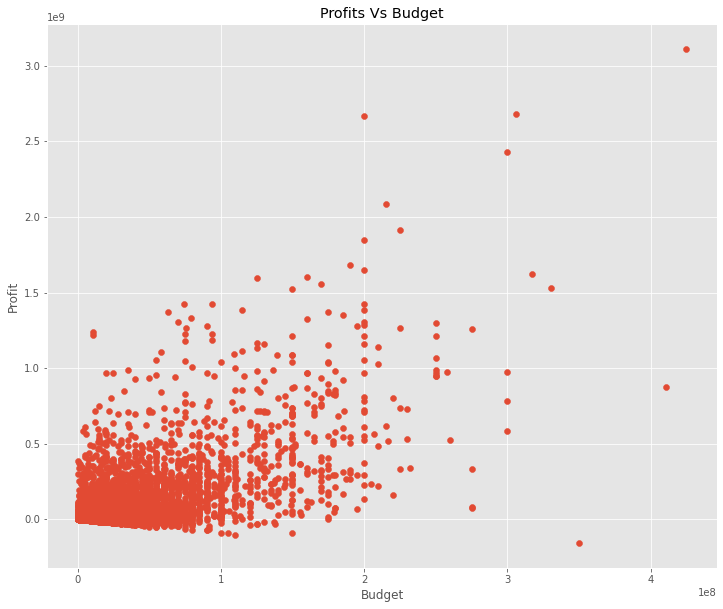

In [255]:
#ploting a scatter plot to visualize correlation.
fig,ax = plt.subplots(figsize=(12,10))
ax.scatter(mov_budget.production_budget,mov_budget.Profits)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Profits Vs Budget')


This scatter plot helps us visualize a possitive correlation between budget and profit.

In [256]:
# Now that we are done with writting queries we close the connection to the database
conn.close()

#### Conclusion

1. The budget assigned to a movie production is directly proportional to the profits generated.
2. We would rather incurr a high budget towards production so as to generate more income from the movie.

### Findings

1. Runtime is inversely related to movie average ratings. Long movies have lower ratings compared to short movies.
2. Different genres perfom differently in the movie industry with regard to the ratings.
      1. Documentary(7.3)
      2. Drama(6.5)
      3. Comedy,Drama(6.4)
      4. Comedy,Drama,Romance(6.3)
      5. Drama,Romance(6.2)
      6. Drama,Thriller(6.1)
      7. Comedy,Romance(5.8)
      8. Comedy (5.8)
      9. Action(5.6)
      10. Thriller(5.5)
      11. Horror,Thriller(4.7)
      12. Horror(4.7)
3. Different writters and dirrectors perfom differently based on factors such as experience and expertise in the industry by looking at their average rating movies perfomance.
4. Movie budget and revenue genaration are directly related where high budget generates more revenue.

### Recommendations

 1. The studio should aim at producing movies with relatively short runtime as it is inversely related to average rating.
 2. The studio should aim at producing the top preffered genres that have a high average rating as it will in the long run facilitate movie success.
 3. The studio should aim at using the top directors and writters according to experience in the industry according to their average ratings.
 4. The studio should aim at assigning the required budget and not under funding their movie projects since from the data movies with high budgets generated higher revenue.      

### Summary

In this project we have familiarized with the movie industry and the factors that affect the movie success so as to advise microsoft movie studios in their start up.